In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model


%matplotlib inline

np.random.seed(1) 


In [2]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [3]:
N = 500 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
Y = np.zeros((N*K,1), dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    Y[ix] = j
X=X.T
Y=Y.T
    

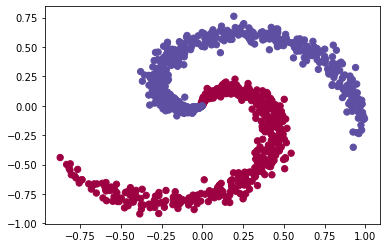

In [4]:
plt.scatter(X[ 0,:], X[ 1,:], c=Y, s=40, cmap=plt.cm.Spectral);

In [5]:
Y.shape

(1, 1000)

In [6]:

shape_X = X.shape
shape_Y = Y.shape
m = Y.shape[1] 

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 1000)
The shape of Y is: (1, 1000)
I have m = 1000 training examples!


In [7]:
def layer_sizes(X, Y):
    n_x = X.shape[0] 
    n_h = 100
    n_y = Y.shape[0] 
    return (n_x, n_h, n_y)

In [8]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [9]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [10]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [11]:
def compute_cost(A2, Y):
    m = Y.shape[1]
    cost =  - np.sum(np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))) / m
    cost = float(np.squeeze(cost))  
    assert(isinstance(cost, float))
    
    return cost

In [12]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [13]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
   
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [14]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    
    return predictions

In [15]:
def neural_n_model(X, Y, n_h,learning_rate = 0.05,num_iterations = 10000, print_cost=False):
    cost_n=[]
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        if print_cost and i % 1000 == 0:
            cost_n.append(cost)
            print ("Cost after iteration %i: %f" %(i, cost))
    d = {"costs": cost_n,
         "parameters":parameters,
         "W1" : parameters['W1'],
         "b1" : parameters['b1'],
         "W2" : parameters['W2'],
         "b2" : parameters['b2'],
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

Cost after iteration 0: 0.693111
Cost after iteration 1000: 0.041877
Cost after iteration 2000: 0.026037
Cost after iteration 3000: 0.021951
Cost after iteration 4000: 0.019917
Cost after iteration 5000: 0.018617
Cost after iteration 6000: 0.017605
Cost after iteration 7000: 0.016264
Cost after iteration 8000: 0.013765
Cost after iteration 9000: 0.011504
Cost after iteration 10000: 0.010369
Cost after iteration 11000: 0.009529
Cost after iteration 12000: 0.008858
Cost after iteration 13000: 0.008315
Cost after iteration 14000: 0.007877
Cost after iteration 15000: 0.007510
Cost after iteration 16000: 0.007191
Cost after iteration 17000: 0.006906
Cost after iteration 18000: 0.006647


C:\Users\msalm\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\msalm\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


Cost after iteration 19000: nan


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

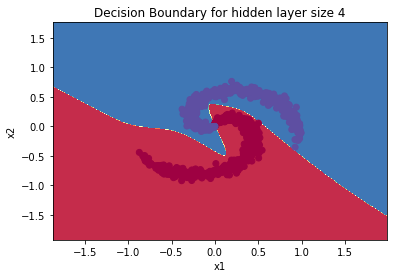

In [16]:
d = neural_n_model(X, Y, n_h = 100,learning_rate = 0.05, num_iterations = 20000, print_cost=True)
 
plot_decision_boundary(lambda x: predict(d["parameters"], x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

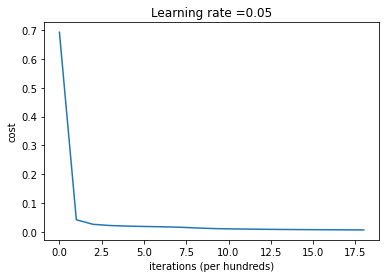

In [21]:
costs = np.squeeze(d["costs"])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [22]:
predictions = predict(d["parameters"], X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 99%


In [23]:
N = 200 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
Y = np.zeros((N*K,1), dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    Y[ix] = j
X_test=X.T
Y_test=Y.T

In [24]:
predictions = predict(d["parameters"], X_test)
print ('Accuracy: %d' % float((np.dot(Y_test,predictions.T) + np.dot(1-Y_test,1-predictions.T))/float(Y_test.size)*100) + '%')

Accuracy: 99%


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

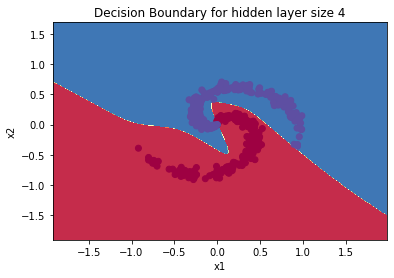

In [25]:
plot_decision_boundary(lambda x: predict(d["parameters"], x.T), X_test, Y_test)
plt.title("Decision Boundary for hidden layer size " + str(4))